Name:N.V.Vyshanvi
Reg.no:BL.EN.U4CSE21130

In [28]:
import pandas as pd
import numpy as np

In [56]:
data = pd.read_excel('entropy_4.xlsx')

In [57]:
data

,age,income,student,credit_rating,buys_computer
0,<=30,high,no,fair,no
1,<=30,high,no,excellent,no
2,31…40,high,no,fair,yes
3,>40,medium,no,fair,yes
4,>40,low,yes,fair,yes
5,>40,low,yes,excellent,no
6,31…40,low,yes,excellent,yes
7,<=30,medium,no,fair,no
8,<=30,low,yes,fair,yes
9,>40,medium,yes,fair,yes


**A1**

In [58]:
import math
def entropy(data):
    total_c = len(data)
    yes_c = len(data[data['buys_computer'] == 'yes'])
    no_c = len(data[data['buys_computer'] == 'no'])
    if yes_c == 0 or no_c == 0:
        return 0
    p_yes = yes_c / total_c
    p_no = no_c / total_c
    entropy = -p_yes * math.log2(p_yes) - p_no * math.log2(p_no)
    return entropy
entropy_root = entropy(data)
def information_gain(data, attribute):
    unique_values = data[attribute].unique()
    weighted_entropy = 0
    for value in unique_values:
        subset = data[data[attribute] == value]
        weight = len(subset) / len(data)
        weighted_entropy += weight * entropy(subset)
    info_gain = entropy_root - weighted_entropy
    return info_gain
attributes = ['age', 'income', 'student', 'credit_rating']
info_gains = {attribute: information_gain(data, attribute) for attribute in attributes}
best_attribute = max(info_gains, key=info_gains.get)
print("Information Gains:", info_gains)
print("Best Attribute:", best_attribute)

Information Gains: {'age': 0.24674981977443933, 'income': 0.02922256565895487, 'student': 0.15183550136234159, 'credit_rating': 0.1299303895316022}
Best Attribute: age


**A2**

In [59]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
X = data.drop(columns=['buys_computer'])
y = data['buys_computer']
categorical_features = ['age', 'income', 'student', 'credit_rating']
preprocessor = ColumnTransformer(transformers=[('cat', OneHotEncoder(), categorical_features)],remainder='passthrough')
model = Pipeline([('preprocessor', preprocessor),('classifier', DecisionTreeClassifier())])
model.fit(X, y)
tree_depth = model.named_steps['classifier'].get_depth()
print("Depth of tree:", tree_depth)


Depth of tree: 4


**A3**

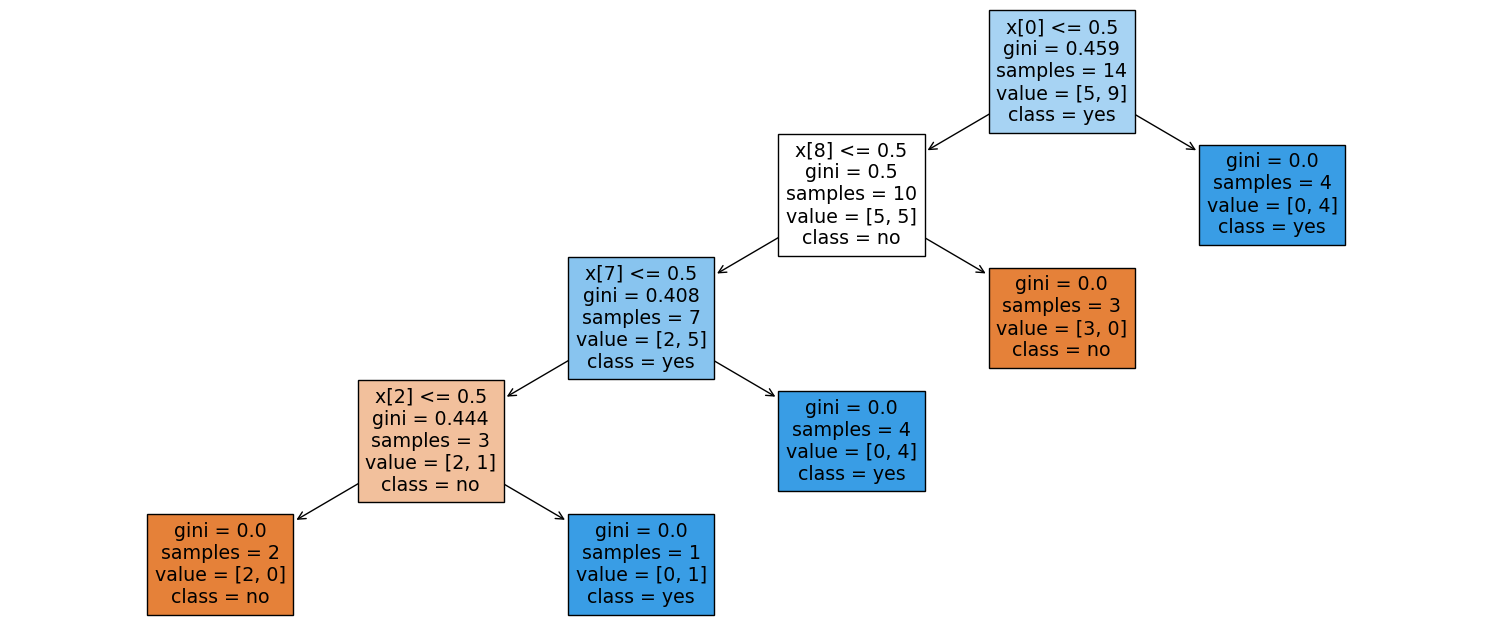

In [62]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(19, 8))
plot_tree(model.named_steps['classifier'], filled=True, class_names=['no', 'yes'])
plt.show()


**A4**

In [63]:
data=pd.read_csv("Train_data.csv")

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Training data accuracy =  0.9999470731449137
Testing data accuracy =  0.996665608129565


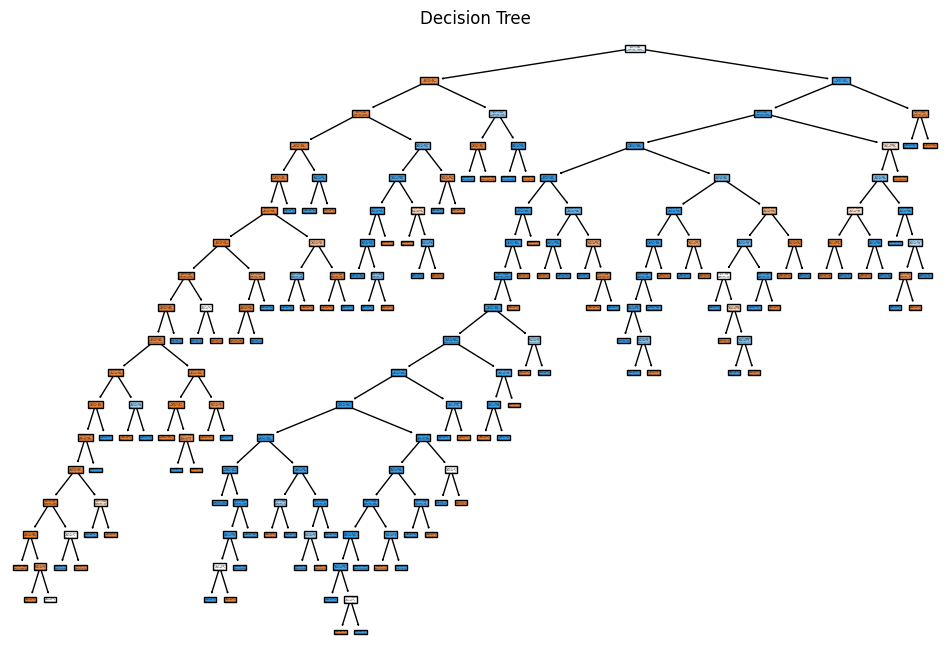

In [64]:
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import OneHotEncoder as ohe
x = data.loc[:, "duration":"dst_host_srv_rerror_rate"]
y = data["class"]
x_train, x_test, y_train, y_test = tts(x, y, test_size = 0.25, random_state = 0)
catg_cols = ["protocol_type", "service", "flag"]
encoder = ohe(sparse=False, drop='first')
x_train_encoded = encoder.fit_transform(x_train[catg_cols])
x_train = x_train.drop(columns = catg_cols)
x_train = np.hstack((x_train, x_train_encoded))
x_test_encoded = encoder.transform(x_test[catg_cols])
x_test = x_test.drop(columns = catg_cols)
x_test = np.hstack((x_test, x_test_encoded))
from sklearn.tree import DecisionTreeClassifier as dtc
from sklearn import tree
model = dtc()
model = model.fit(x_train,y_train)
print("Training data accuracy = ", model.score(x_train, y_train))
print("Testing data accuracy = ", model.score(x_test, y_test))
plt.figure(figsize=(12, 8))
tree.plot_tree(model, filled = True)
plt.title("Decision Tree")
plt.show()

**A5**

Training data accuracy =  0.9889382872869694
Testing data accuracy =  0.989044140997142


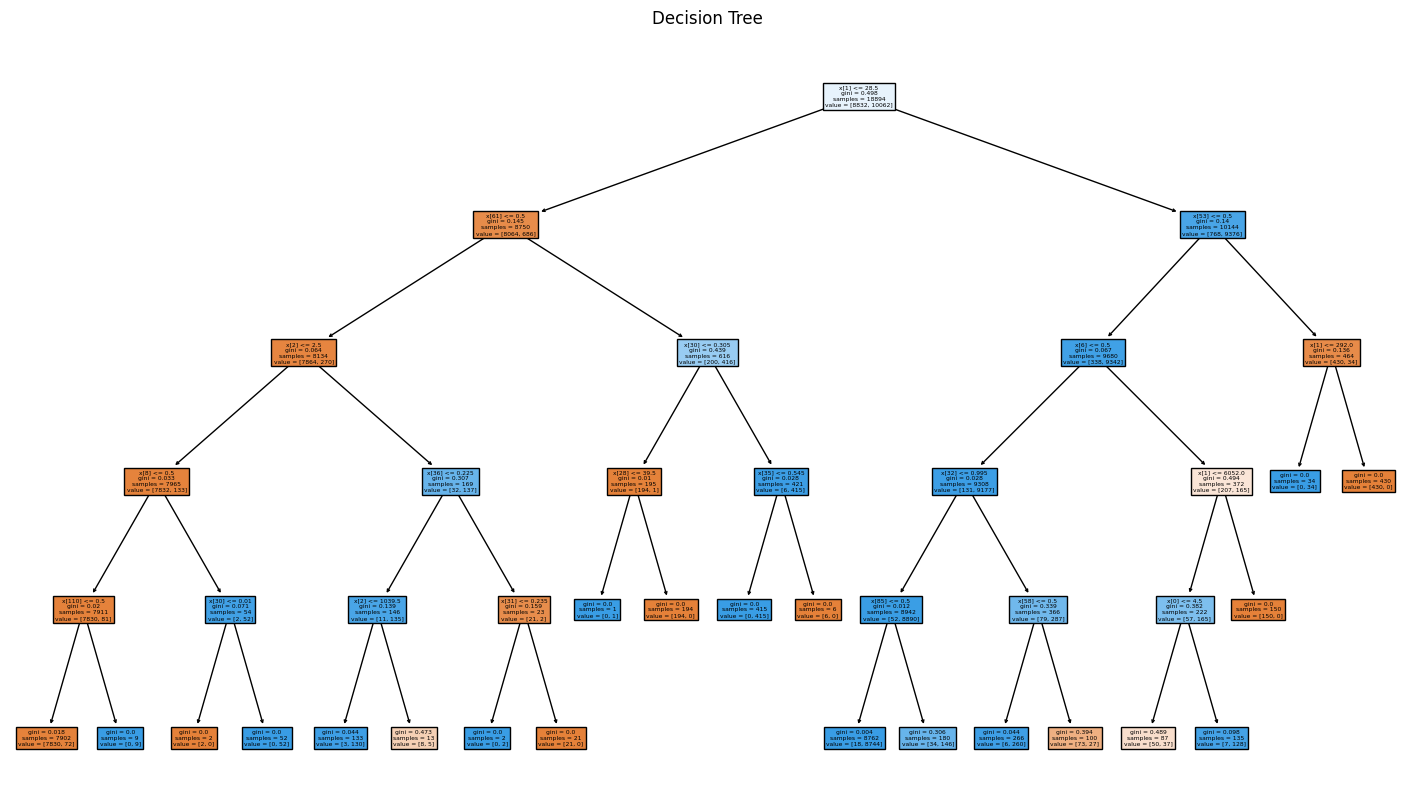

In [65]:
from sklearn.tree import DecisionTreeClassifier as dtc
from sklearn import tree
model = dtc(max_depth = 5)
model = model.fit(x_train,y_train)
print("Training data accuracy = ", model.score(x_train, y_train))
print("Testing data accuracy = ", model.score(x_test, y_test))
plt.figure(figsize=(18, 10))
tree.plot_tree(model, filled = True)
plt.title("Decision Tree")
plt.show()

**A6**

Training Set Accuracy =  0.9999470731449137
Test Set Accuracy =  0.9960304858685297


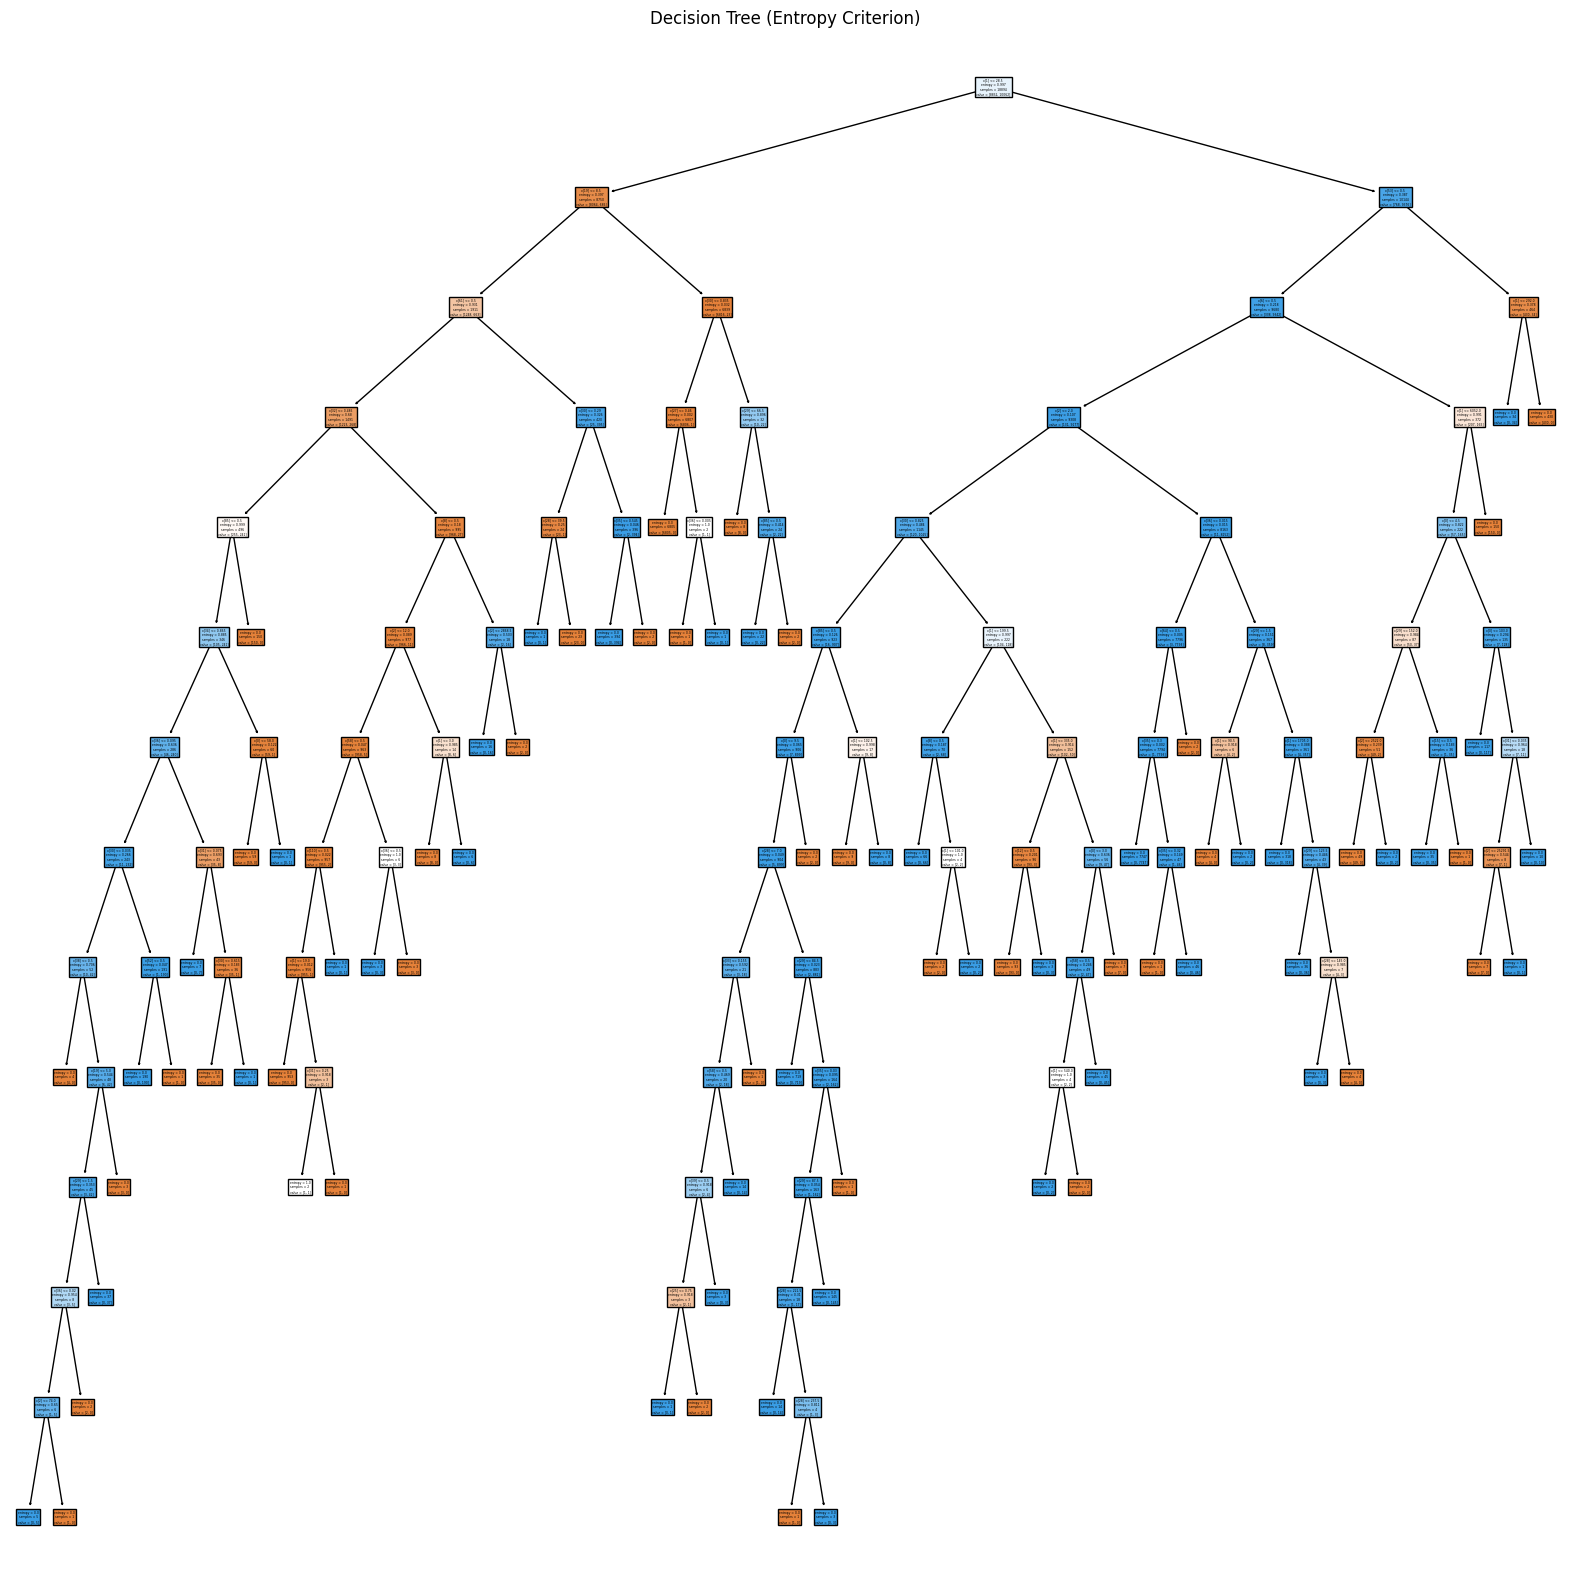

In [66]:
model_entropy = dtc(criterion="entropy")
model_entropy.fit(x_train, y_train)
print("Training Set Accuracy = ", model_entropy.score(x_train, y_train))
print("Test Set Accuracy = ", model_entropy.score(x_test, y_test))
plt.figure(figsize=(20, 20))
tree.plot_tree(model_entropy, filled=True)
plt.title("Decision Tree (Entropy Criterion)")
plt.show()

**A7**

In [67]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data['protocol_type'] = encoder.fit_transform(data['protocol_type'])
data['service'] = encoder.fit_transform(data['service'])
data['flag'] = encoder.fit_transform(data['flag'])
data['class'] = encoder.fit_transform(data['class'])
X = data.drop('class', axis=1)
y = data['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)
y_pred_dt = decision_tree.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_score_dt = f1_score(y_test, y_pred_dt)
confusion_matrix_dt = confusion_matrix(y_test, y_pred_dt)
print(f"accuracy: {accuracy_dt:.4f}")
print(f"Precision: {precision_dt:.4f}")
print(f"Recall: {recall_dt:.4f}")
print(f"F1-Score: {f1_score_dt:.4f}")
confusion_matrix_train = confusion_matrix(y_test, y_pred_dt)
print("\nConfusion Matrix (Train Data):")
print(confusion_matrix_train)
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_score_rf = f1_score(y_test, y_pred_rf)
confusion_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print(f"accuracy: {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1-Score: {f1_score_rf:.4f}")
confusion_matrix_train = confusion_matrix(y_test, y_pred_rf)
print("\nConfusion Matrix (Train Data):")
print(confusion_matrix_train)
if ((precision_rf >= precision_dt) & (recall_rf >= recall_dt) & (f1_score_rf >= f1_score_dt) & (accuracy_rf >= accuracy_dt)):
    print("\n Random forest performance is better")
else:
    print("\n Decision tree performance is better.")

accuracy: 0.9958
Precision: 0.9966
Recall: 0.9955
F1-Score: 0.9961

Confusion Matrix (Train Data):
[[2356    9]
 [  12 2662]]
accuracy: 0.9978
Precision: 0.9974
Recall: 0.9985
F1-Score: 0.9979

Confusion Matrix (Train Data):
[[2358    7]
 [   4 2670]]

 Random forest performance is better


**A8**

Behavior of a Random Forest classifier for network intrusion detection involves the following parameters and attributes:
1. Number of Trees:Increasing the number of trees improves model performance and resistance against overfitting, which is useful for capturing varied incursion patterns.
2. Max Depth:Adjusting the maximum depth prevents an excessive number of trees, which is necessary for ensuring the model's generalisation capabilities.
3. Minimum Samples to Split:Balancing this parameter is critical; a number that is too high may result in missing attack detections, while a value that is too low may result in overfitting.
4. Minimum Samples per Leaf: Achieving an optimal balance is critical, as higher values simplify trees by limiting overfitting while avoiding underfitting.
5. Maximum Features: Controlling feature diversity in tree construction affects the model's capacity to detect varied incursion patterns.
6. Bootstrap: Enabling bootstrap sampling increases randomness, allowing for a wider range of trees and better generalisation.
Understanding these features enables the Random Forest classifier for network intrusion detection to be effectively achieve the best  performance.